# Uploading Data
There are two approaches to uploading data.

In [1]:
import hub
from hub.schema import ClassLabel, Image, Tensor
from util import audio2image
from tqdm import tqdm
from hub import Dataset, transform, schema

from skimage import img_as_ubyte
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from time import time
%matplotlib inline

In [2]:
fnames = glob("../Data/*")
fnames[:5], len(fnames)

(['../Data/8514-8.wav',
  '../Data/3724-3.wav',
  '../Data/8405-5.wav',
  '../Data/6593-3.wav',
  '../Data/5819-8.wav'],
 8732)

In [3]:
my_schema = {
    "image": Image(shape=(224, 224), dtype="uint8"),
    "label": ClassLabel(num_classes=10),
}

In [4]:
@transform(schema=my_schema)
def load_transform(sample):
    image = img_as_ubyte(audio2image(sample))
    label = int(sample.split("-")[1].split(".")[0])
    
    return {
        "image" : image,
        "label" : label
    }

In [6]:
ds = load_transform(fnames[:2])  # transform object
type(ds)

hub.compute.transform.Transform

In [7]:
start = time()

tag = "mynameisvinn/spectrograms"
ds2 = ds.store(tag)
type(ds2)

end = time()
print("elapsed time:", end - start)

Computing the transormation: 100%|██████████| 2.00/2.00 [00:00<00:00, 4.20 items/s]

elapsed time: 3.596972942352295


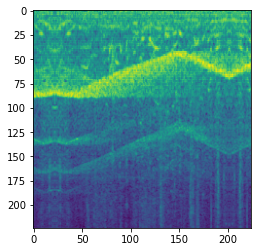

In [8]:
plt.imshow(ds2['image', 0].compute())

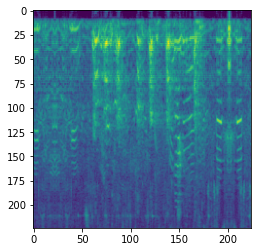

In [9]:
plt.imshow(ds2['image', 1].compute())